In [1]:
import numpy as np

In [2]:
# Shape functions and derivatives 

def N1(xi):
    return 0.5*xi*(xi-1)
def N2(xi):
    return -1.0*(xi+1)*(xi-1)
def N3(xi):
    return 0.5*xi*(xi+1)
def dN1dxi(xi):
    return 0.5*(xi-1) + 0.5*xi
def dN2dxi(xi):
    return -1.0*(xi-1) -1.0*(xi+1)
def dN3dxi(xi):
    return 0.5*(xi+1) + 0.5*xi

In [3]:
## what if we had two elements 
node_x = np.array([0.,1.,2.,3.,4.])
elements = np.array([[0,1,2],[2,3,4]])
node_theta = np.array([0.0,-0.5,0.0,1.5,4.0])

## FOR LOOP OVER ELEMENTS 
integral = 0
for ei in range(2):
    print('element %i'%ei)
    n1e = elements[ei,0]
    n2e = elements[ei,1]
    n3e = elements[ei,2]
    print('made up of nodes %i,%i,%i'%(n1e,n2e,n3e))
    x1e = node_x[n1e]
    x2e = node_x[n2e]
    x3e = node_x[n3e]
    # nodal values of theta
    th1e = node_theta[n1e]
    th2e = node_theta[n2e]
    th3e = node_theta[n3e]
    # Integral, with 3 point Gauss 
    xi_ip_vec = np.array([-np.sqrt(3/5.),0,np.sqrt(3/5.)])
    w_ip_vec = np.array([5./9,8./9,5./9])
    ## LOOP OVER INTEGRATION POINTS
    for ip in range(3):
        xi = xi_ip_vec[ip]
        wip = w_ip_vec[ip]
        ## EVALUATE THE ISOPARAMETRIC MAP
        x = N1(xi)*x1e + N2(xi)*x2e + N3(xi)*x3e 
        ## EVALUATE THE JACOBIAN OF THE ISOPARAMETRIC MAP
        dxdxi = dN1dxi(xi)*x1e + dN2dxi(xi)*x2e +  dN3dxi(xi)*x3e
        ## EVALUATE THE FUNCTION AT XI
        fxi = N1(xi)*th1e + N2(xi)*th2e + N3(xi)*th3e 
        ## PUT TOGETHER 
        integral += wip*dxdxi*fxi 

print('integral')
print(integral)

element 0
made up of nodes 0,1,2
element 1
made up of nodes 2,3,4
integral
2.666666666666667


## Integration in one quadratic quadrilateral 

In [12]:
## nodal coordinates of the quadrilateral in x-y space 
node_x = np.array([[0.,0.], [3.,0.], [5.,4.], [2.,4.], [1.5,0.], [4.5, 2.], [3.5,4.], [1.5,2.], [2.5,2],\
                  [4.,0.],[5.5,2],[6.,4],[5.,0.],[6.5,2],[7.,4]])
elements = np.array([[0,1,2,3,4,5,6,7,8],[1,12,14,2,9,13,11,5,10]])

In [5]:
def func(x,y):
    return 0.5*x**2-y

In [10]:
## SHAPE FUNCTIONS FOR 2D QUADRATIC QUADRILATERAL
def Ns(xi,eta):
    # get 2D functions from 'tensor product of 1d functions'
    N1_2d = N1(xi)*N1(eta)
    N2_2d = N3(xi)*N1(eta)
    N3_2d = N3(xi)*N3(eta)
    N4_2d = N1(xi)*N3(eta)
    N5_2d = N2(xi)*N1(eta)
    N6_2d = N3(xi)*N2(eta)
    N7_2d = N2(xi)*N3(eta)
    N8_2d = N1(xi)*N2(eta)
    N9_2d = N2(xi)*N2(eta)
    return np.array([N1_2d,N2_2d,N3_2d,N4_2d,N5_2d,N6_2d,N7_2d,N8_2d,N9_2d])

def dNsdxi(xi,eta):
    dN1_2d = [dN1dxi(xi)*N1(eta),N1(xi)*dN1dxi(eta)]
    dN2_2d = [dN3dxi(xi)*N1(eta),N3(xi)*dN1dxi(eta)]
    dN3_2d = [dN3dxi(xi)*N3(eta),N3(xi)*dN3dxi(eta)]
    dN4_2d = [dN1dxi(xi)*N3(eta),N1(xi)*dN3dxi(eta)]
    dN5_2d = [dN2dxi(xi)*N1(eta),N2(xi)*dN1dxi(eta)]
    dN6_2d = [dN3dxi(xi)*N2(eta),N3(xi)*dN2dxi(eta)]
    dN7_2d = [dN2dxi(xi)*N3(eta),N2(xi)*dN3dxi(eta)]
    dN8_2d = [dN1dxi(xi)*N2(eta),N1(xi)*dN2dxi(eta)]
    dN9_2d = [dN2dxi(xi)*N2(eta),N2(xi)*dN2dxi(eta)]
    return np.array([[dN1_2d[0],dN2_2d[0],dN3_2d[0],dN4_2d[0],dN5_2d[0],dN6_2d[0],dN7_2d[0],dN8_2d[0],dN9_2d[0]],\
                     [dN1_2d[1],dN2_2d[1],dN3_2d[1],dN4_2d[1],dN5_2d[1],dN6_2d[1],dN7_2d[1],dN8_2d[1],dN9_2d[1]]])

In [16]:
## INTEGRAL 
## FOR LOOP OVER ELEMENTS 
integral = 0
for ei in range(2):
    print('element %i'%ei)
#     n1e = elements[ei,0]
#     n2e = elements[ei,1]
#     n3e = elements[ei,2]
#     print('made up of nodes %i,%i,%i'%(n1e,n2e,n3e))
#     x1e = node_x[n1e]
#     x2e = node_x[n2e]
#     x3e = node_x[n3e]
#     # nodal values of theta
#     th1e = node_theta[n1e]
#     th2e = node_theta[n2e]
#     th3e = node_theta[n3e]
    x_node_ei = np.zeros((9,2))
    # loop over local node number, 0, to 9
    for ni in range(9):
        global_node = elements[ei,ni]
        x_node_ei[ni] = node_x[global_node]
    print('global node numbers that make up this element')
    print(elements[ei])
    print('coordinates of the nodes that make up this element')
    print(x_node_ei)
    # Integral, with 3 point Gauss per direction 
    #xi_ip_vec = np.array([-np.sqrt(3/5.),0,np.sqrt(3/5.)])
    #w_ip_vec = np.array([5./9,8./9,5./9])
    xi_ip_vec = np.array([-np.sqrt(1/3.),np.sqrt(1/3.)])
    w_ip_vec = np.array([1.0,1.0])
    ## LOOP OVER INTEGRATION POINTS
    print('loop over integration points')
    for ip_1 in range(2):
        for ip_2 in range(2):
            xi = xi_ip_vec[ip_1]
            eta = xi_ip_vec[ip_2]
            print('xi, eta')
            print(xi,eta)
            wip1 = w_ip_vec[ip_1]
            wip2 = w_ip_vec[ip_2]
            ## EVALUATE THE ISOPARAMETRIC MAP
            Nvec = Ns(xi,eta)
            #print(Nvec)
            x = np.zeros((2))
            for ni in range(9):
                x += Nvec[ni]*x_node_ei[ni]
            print('x,y')
            print(x[0],x[1])
            ## EVALUATE THE JACOBIAN OF THE ISOPARAMETRIC MAP
            dxdxi = np.zeros((2,2))
            dNvec = dNsdxi(xi,eta)
            for ni in range(9):
                dxdxi += np.outer(x_node_ei[ni],dNvec[:,ni])
            ## EVALUATE THE FUNCTION AT XI
            fxy = func(x[0],x[1])
            ## PUT TOGETHER 
            integral += wip1*wip2*np.linalg.det(dxdxi)*fxy 

print('integral')
print(integral)

element 0
global node numbers that make up this element
[0 1 2 3 4 5 6 7 8]
coordinates of the nodes that make up this element
[[0.  0. ]
 [3.  0. ]
 [5.  4. ]
 [2.  4. ]
 [1.5 0. ]
 [4.5 2. ]
 [3.5 4. ]
 [1.5 2. ]
 [2.5 2. ]]
loop over integration points
xi, eta
-0.5773502691896257 -0.5773502691896257
x,y
1.1677354381370468 0.8452994616207485
xi, eta
-0.5773502691896257 0.5773502691896257
x,y
2.3224359765162985 3.1547005383792515
xi, eta
0.5773502691896257 -0.5773502691896257
x,y
2.899786245705924 0.8452994616207485
xi, eta
0.5773502691896257 0.5773502691896257
x,y
4.054486784085176 3.1547005383792515
element 1
global node numbers that make up this element
[ 1 12 14  2  9 13 11  5 10]
coordinates of the nodes that make up this element
[[3.  0. ]
 [5.  0. ]
 [7.  4. ]
 [5.  4. ]
 [4.  0. ]
 [6.5 2. ]
 [6.  4. ]
 [4.5 2. ]
 [5.5 2. ]]
loop over integration points
xi, eta
-0.5773502691896257 -0.5773502691896257
x,y
4.178632794954082 0.8452994616207485
xi, eta
-0.5773502691896257 0.577350

In [18]:
import matplotlib
import random
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
%matplotlib inline 
%precision 5

'%.5f'

(-0.3219325247694748,
 5.322629037039524,
 -0.2547448310325913,
 4.2547506070971375)

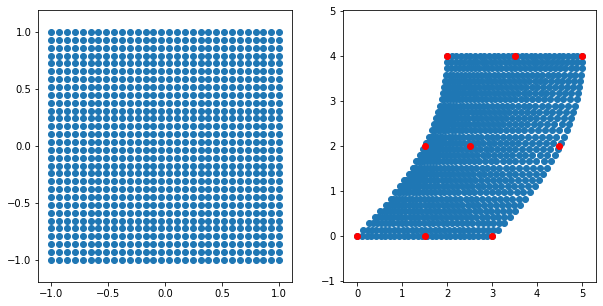

In [22]:
f, (ax1,ax2) = plt.subplots(1, 2,figsize=(10,5))
xi_vec = np.linspace(-1,1,30)
eta_vec = np.linspace(-1,1,30)
xi_mat = np.zeros((30*30))
eta_mat = np.zeros((30*30))
x_mat = np.zeros((30*30))
y_mat = np.zeros((30*30))
for i in range(30):
    for j in range(30):
        ## EVALUATE ISOPARAMETRIC MAP FROM XI,ETA TO X,Y
        xi = xi_vec[i]
        eta = eta_vec[j]
        evalN = Ns(xi,eta)
        x = 0
        y = 0
        for ni in range(9):
            x+= evalN[ni]*node_x[ni,0]
            y+= evalN[ni]*node_x[ni,1]
        ## STORE
        x_mat[i*30+j] = x
        y_mat[i*30+j] = y
        xi_mat[i*30+j] = xi
        eta_mat[i*30+j] = eta
ax1.scatter(xi_mat,eta_mat)
ax2.scatter(x_mat,y_mat)
for ni in range(9):
    ax2.scatter(node_x[ni,0],node_x[ni,1],color='red')
ax1.axis('equal')
ax2.axis('equal')